<a href="https://colab.research.google.com/github/DevuP1506/Cognorise-Internship-Tasks/blob/main/NLP_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SENTIMENT ANALYSIS ON MOVIE REVIEWS.**


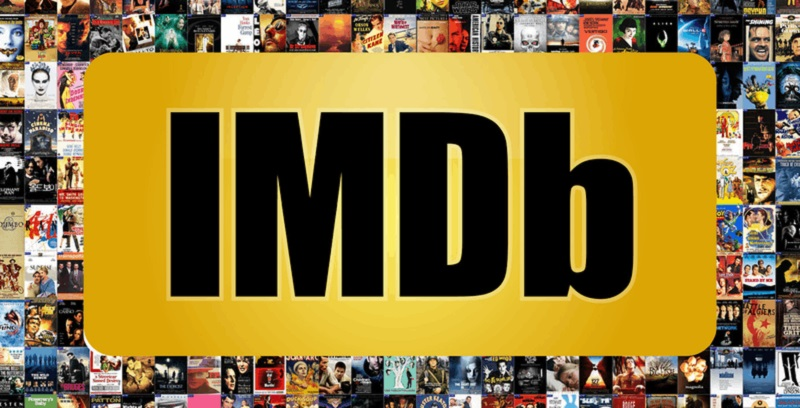

## **Content Overview.**



## 1.   Preface.
## 2.   Data Inspection.
## 3. Data Visualization.
## 4. Data Preprocessing.
## 5. Model Training.
## 6. Model Evaluation.
## 7. Conclusion.



## **1. Preface**

Sentiment analysis is a fascinating field of study that intersects with natural language processing and machine learning. It involves the computational identification and categorization of opinions expressed in a piece of text, especially in order to determine whether the writer’s attitude towards a particular topic, product, or service is positive, negative, or neutral.

In the context of movie reviews, sentiment analysis aims to systematically evaluate the emotional tone behind a review and categorize it accordingly. This can be particularly useful for both consumers and producers of films.By analyzing a large number of reviews, filmmakers and studios can gain insights into how their movies are perceived by the audience. This can help them understand which aspects of the movie are liked or disliked.

It helps in quickly gauging the general consensus about a movie, while producers can use it to gather feedback and improve future projects.

Through this project, we aim to showcase the capabilities of NLP and ML in understanding human language nuances and extracting meaningful information from vast amounts of textual data.The Dataset is sourced from Kaggle with 50001 reviews and its corresponding Sentiments.

Machine Learning Algorithms like Logistic Regression, K Nearest Neighbors,Naive Bayes,Suport Vector Machine,Decision tree,Random Forest and XGBoosting Classifier is implemented for this Classification Problem

### Import Necessary Libraries.

In [73]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
import re
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report

### Import Data.

In [58]:
colnames=['review','sentiment']
df=pd.read_csv('/content/IMDB Dataset.csv',encoding='ISO-8859-1',names=colnames)
df

,review,sentiment
0,review,sentiment
1,One of the other reviewers has mentioned that ...,positive
2,A wonderful little production. <br /><br />The...,positive
3,I thought this was a wonderful way to spend ti...,positive
4,Basically there's a family where a little boy ...,negative
...,...,...
49996,I thought this movie did a down right good job...,positive
49997,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49998,I am a Catholic taught in parochial elementary...,negative
49999,I'm going to have to disagree with the previou...,negative


## **2. Data Inspection.**

In [59]:
#Get the first five rows of data.
df.head()

,review,sentiment
0,review,sentiment
1,One of the other reviewers has mentioned that ...,positive
2,A wonderful little production. <br /><br />The...,positive
3,I thought this was a wonderful way to spend ti...,positive
4,Basically there's a family where a little boy ...,negative


In [60]:
#Get the last five rows of data
df.tail()

,review,sentiment
49996,I thought this movie did a down right good job...,positive
49997,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49998,I am a Catholic taught in parochial elementary...,negative
49999,I'm going to have to disagree with the previou...,negative
50000,No one expects the Star Trek movies to be high...,negative


In [61]:
#Get the info about the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50001 non-null  object
 1   sentiment  50001 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [62]:
#Check for the null values in the data.
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [63]:
#Check for the uniqueness in the target column.
df['sentiment'].unique()

array(['sentiment', 'positive', 'negative'], dtype=object)

In [64]:
#Droping the data entry error 'sentiment' from the sentiment column.
df.drop(df.index[df['sentiment']=='sentiment'],axis=0,inplace=True)
df

,review,sentiment
1,One of the other reviewers has mentioned that ...,positive
2,A wonderful little production. <br /><br />The...,positive
3,I thought this was a wonderful way to spend ti...,positive
4,Basically there's a family where a little boy ...,negative
5,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49996,I thought this movie did a down right good job...,positive
49997,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49998,I am a Catholic taught in parochial elementary...,negative
49999,I'm going to have to disagree with the previou...,negative


In [65]:
#Correcting index
df.reset_index(drop=True,inplace=True)#or give ignore_index=True
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [66]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [67]:
#Replace Positive:1,Negative=0 in target variable
df['sentiment']=df['sentiment'].map({'positive':1,'negative':0})
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


## **3. Data Visualization.**

### Get the distribution of positive and negative sentiments.

In [68]:
#Get the count for target variables.
sentiment_count=df['sentiment'].value_counts()
sentiment_count

sentiment
1    25000
0    25000
Name: count, dtype: int64

In [69]:
#PieChart
pie_chart = px.pie(sentiment_count,
                  values=sentiment_count.values,
                  names=sentiment_count.index,
                  color=sentiment_count.index,
                  title='Distribution spam and ham',
                  labels={'values': 'Frequency', 'names': 'sentiment'},
                       hole=.4,)
# Adding text labels
pie_chart.update_traces(textinfo='label+percent', pull=[0.1, 0.1, 0.1, 0.1, 0.1])

# Customizing layout
pie_chart.update_layout(font=dict(size=14, color="black"), height=500,template='plotly')
# Show the pie chart
pie_chart.show()

### Displaying the word cloud of Movie Reviews.

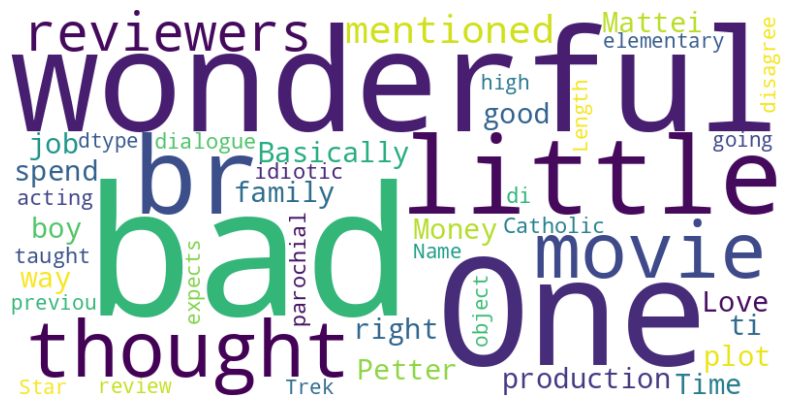

In [70]:
#Reviews
words=df['review']

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(str(words))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## **4. Data Preprocessing.**

In [ ]:
#Download all the package
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
#Removing html tags
def removing_html_tags(reviews):
    return re.sub(r'<[^<]+?>', '', reviews)

df['review']=df['review'].apply(removing_html_tags)

In [ ]:
df['review'].str.contains('html')


0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Name: review, Length: 50000, dtype: bool

In [ ]:
def removing_url(text):
    return re.sub(r'http[s]?://\S+|www\.\S+', '', text)


In [ ]:
df['review'] = df['review'].apply(removing_url)

In [ ]:
df['review'].str.contains('url')

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Name: review, Length: 50000, dtype: bool

In [ ]:
#Assigning reviews to a variable
text=df.review
text


0        One of the other reviewers has mentioned that ...
1        A wonderful little production. The filming tec...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [ ]:
#Tokenization
from nltk import TweetTokenizer
tk=TweetTokenizer()
text=text.apply(lambda x:tk.tokenize(x)).apply(lambda x:' '.join(x))#To join the tokens together with a space
text

0        One of the other reviewers has mentioned that ...
1        A wonderful little production . The filming te...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's " Love in the Time of Money " ...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot , bad dialogue , bad acting , idiotic...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [ ]:
#Removing Special characters
text=text.str.replace('[^a-zA-Z0-9]+',' ')# '+' is used to remove combination of special characters
text

0        One of the other reviewers has mentioned that ...
1        A wonderful little production . The filming te...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's " Love in the Time of Money " ...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot , bad dialogue , bad acting , idiotic...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [ ]:
#Removing words having length less than 3 also index should be corrected
from nltk.tokenize import word_tokenize
text=text.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
text

0        One the other reviewers has mentioned that aft...
1        wonderful little production The filming techni...
2        thought this was wonderful way spend time too ...
3        Basically there family where little boy Jake t...
4        Petter Mattei Love the Time Money visually stu...
                               ...                        
49995    thought this movie did down right good job was...
49996    Bad plot bad dialogue bad acting idiotic direc...
49997    Catholic taught parochial elementary schools n...
49998    going have disagree with the previous comment ...
49999    one expects the Star Trek movies high art but ...
Name: review, Length: 50000, dtype: object

### Stemming Using Snow Ball Stemmer.

In [ ]:
#Stemming
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
text=text.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
text

0        one the other review has mention that after wa...
1        wonder littl product the film techniqu veri un...
2        thought this was wonder way spend time too hot...
3        basic there famili where littl boy jake think ...
4        petter mattei love the time money visual stun ...
                               ...                        
49995    thought this movi did down right good job was ...
49996    bad plot bad dialogu bad act idiot direct the ...
49997    cathol taught parochi elementari school nun ta...
49998    go have disagre with the previous comment and ...
49999    one expect the star trek movi high art but the...
Name: review, Length: 50000, dtype: object

### Vectorization.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(text)

In [ ]:
train_data.shape

(50000, 81501)

In [ ]:
print(train_data)

  (0, 65073)	0.05240986327926238
  (0, 18334)	0.08524895108639924
  (0, 80837)	0.03606485447374018
  (0, 73124)	0.053808433823775405
  (0, 12016)	0.0275045322819646
  (0, 77313)	0.04716962436924482
  (0, 75000)	0.08066649025934858
  (0, 15489)	0.0740283914581285
  (0, 7641)	0.043241725487824255
  (0, 45077)	0.042457734410027814
  (0, 24676)	0.051663024688019844
  (0, 65631)	0.0651679569373323
  (0, 68738)	0.05938108415213064
  (0, 40463)	0.04927011655159831
  (0, 71693)	0.029888578646504124
  (0, 8808)	0.08836763308424558
  (0, 36471)	0.03108318128176995
  (0, 74255)	0.0402737395613189
  (0, 7469)	0.033761029151924256
  (0, 14665)	0.05785184621435937
  (0, 46435)	0.059256217928939287
  (0, 44274)	0.06486484922836244
  (0, 78681)	0.028887930947033964
  (0, 29107)	0.05320810746047344
  (0, 51833)	0.05488842241208213
  :	:
  (49999, 63388)	0.10002003668409916
  (49999, 51574)	0.05313653562025728
  (49999, 78681)	0.05539878906293442
  (49999, 79123)	0.04524416117608433
  (49999, 11462)	0.0

In [ ]:
y=df['sentiment'].values
y

array([1, 1, 1, ..., 0, 0, 0])

## **5. Model Training.**

In [ ]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data,y,test_size=0.30,random_state=42)
x_train

<35000x81501 sparse matrix of type '<class 'numpy.float64'>'
	with 4175414 stored elements in Compressed Sparse Row format>

In [ ]:
x_test

<15000x81501 sparse matrix of type '<class 'numpy.float64'>'
	with 1802153 stored elements in Compressed Sparse Row format>

In [ ]:
y_train

array([0, 1, 0, ..., 0, 1, 1])

In [ ]:
y_test

array([1, 1, 0, ..., 0, 1, 1])

In [75]:

l_model=LogisticRegression()
k_model=KNeighborsClassifier(n_neighbors=7)
n_model=MultinomialNB()
d_model=DecisionTreeClassifier(criterion='entropy')
r_model=RandomForestClassifier(criterion='entropy')
x_model=XGBClassifier()
lst_model=[l_model,k_model,n_model,d_model,r_model,x_model]

In [ ]:
for i in lst_model:
  print("Model name is",i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("*****************")
  print(confusion_matrix(y_test,y_pred))
  print("Acuracy score is",i)
  print(accuracy_score(y_test,y_pred))

Model name is LogisticRegression()
*****************
[[6555  856]
 [ 713 6876]]
Acuracy score is LogisticRegression()
0.8954
Model name is KNeighborsClassifier(n_neighbors=7)
*****************
[[5606 1805]
 [1431 6158]]
Acuracy score is KNeighborsClassifier(n_neighbors=7)
0.7842666666666667
Model name is MultinomialNB()
*****************
[[6529  882]
 [1299 6290]]
Acuracy score is MultinomialNB()
0.8546
Model name is DecisionTreeClassifier(criterion='entropy')
*****************
[[5374 2037]
 [2154 5435]]
Acuracy score is DecisionTreeClassifier(criterion='entropy')
0.7206
Model name is RandomForestClassifier(criterion='entropy')
*****************
[[6247 1164]
 [1108 6481]]
Acuracy score is RandomForestClassifier(criterion='entropy')
0.8485333333333334
Model name is XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_cate

In [78]:
l_model.fit(x_train,y_train)
y_pred1=l_model.predict(x_test)
y_pred1

array([0, 1, 0, ..., 0, 1, 1])

## **6. Model evaluation.**

In [79]:
print(classification_report(y_pred1, y_test))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      7268
           1       0.91      0.89      0.90      7732

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000



## **7.Conclusion**

Among the 6 models created, Logistic Regression outshines the other model with accuracy 90%